# Analysis of COVID-19

In this notebook we will analyze the growth and statistics of COVID-19 pandemic spread. I have collected the data from [Kaggle dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv). This data provides daily information on the number of COVID affected cases throughout the world.

In [1]:
# importing required python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
# get the covid-19 data from file
covid_19 = pd.read_csv('covid_19_data.csv')
covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


The columns are:

| Column          | Description                          |
|:----------------|:-------------------------------------|
| SNo             | Serial Number                        |
| ObservationDate | Observation date in `mm/dd/yyyy`     |
| Province/State  | Province or State                    |
| Country/Region  | Country or region                    |
| Last Update     | Last update date time in UTC         |
| Confirmed       | Cumulative number of confirmed cases |
| Deaths          | Cumulative number of deaths cases    |
| Recovered       | Cumulative number of recovered cases |

In [3]:
print("Shape of the covid-19 data: ", covid_19.shape)
covid_19.describe()

Shape of the covid-19 data:  (19607, 8)


,SNo,Confirmed,Deaths,Recovered
count,19607.0000,19607.000000,19607.000000,19607.000000
mean,9804.0000,3445.555159,211.609731,893.386597
std,5660.1977,16660.567883,1529.580698,6396.045309
min,1.0000,0.000000,0.000000,0.000000
25%,4902.5000,11.000000,0.000000,0.000000
50%,9804.0000,115.000000,1.000000,2.000000
75%,14705.5000,768.000000,10.000000,81.000000
max,19607.0000,295106.000000,27359.000000,123903.000000


In [4]:
print("Count of Null Values in covid_19 dataset: \n", covid_19.isnull().sum())

Count of Null Values in covid_19 dataset: 
 SNo                    0
ObservationDate        0
Province/State     10001
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


The dataset contains 10001 rows with missing values for Province or State column.

In [5]:
# obeserving covid data for US for a single day
covid_19[(covid_19['ObservationDate'] == '04/27/2020')& (covid_19['Country/Region'] == 'US')].head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
19146,19147,04/27/2020,Alabama,US,2020-04-28 02:31:20,6539.0,228.0,0.0
19147,19148,04/27/2020,Alaska,US,2020-04-28 02:31:20,345.0,9.0,0.0
19151,19152,04/27/2020,Arizona,US,2020-04-28 02:31:20,6725.0,275.0,0.0
19152,19153,04/27/2020,Arkansas,US,2020-04-28 02:31:20,3069.0,51.0,0.0
19160,19161,04/27/2020,California,US,2020-04-28 02:31:20,44966.0,1779.0,0.0


In [6]:
# converting ObservationDate column datatype to Datetime of pandas
covid_19['ObservationDate'] = pd.to_datetime(covid_19['ObservationDate'])

### Daywise Analysis

In [7]:
# get the datewise summary of Confirmed, Deaths and Recovered cases
daywise_stat = covid_19.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
daywise_stat.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


In [8]:
confirmed_cases = daywise_stat['Confirmed'].iloc[-1]
recovered_cases = daywise_stat['Recovered'].iloc[-1]
deaths = daywise_stat['Deaths'].iloc[-1]
active_cases = confirmed_cases - (recovered_cases + deaths)
recovered_perc = recovered_cases * 100 / confirmed_cases
death_perc = deaths * 100 / confirmed_cases


print("World wide update (04/28/2020)")
print("Total Confirmed Cases:", confirmed_cases)
print("Total Recovered Cases:", recovered_cases)
print("Total Deaths: ", deaths)
print("Total Active Cases:", active_cases)
print("Total Countries/Regions effected with COVID:", len(covid_19['Country/Region'].unique()))

print("Percentage of Recovered cases:", recovered_perc)
print("Percentage of deaths:", death_perc)

World wide update (04/28/2020)
Total Confirmed Cases: 3116398.0
Total Recovered Cases: 928658.0
Total Deaths:  217153.0
Total Active Cases: 1970587.0
Total Countries/Regions effected with COVID: 220
Percentage of Recovered cases: 29.799082145476927
Percentage of deaths: 6.968076606389813


**World wide COVID-19 spread**

It shows that there are 220 countries or regions affected with COVID-19 cases. Total confirmed cases found till 04/28/2020 are more than 3 millions. The percentage of recovered cases is `29.8` whereas the death percentage is approximately `7`.

### Visualizations

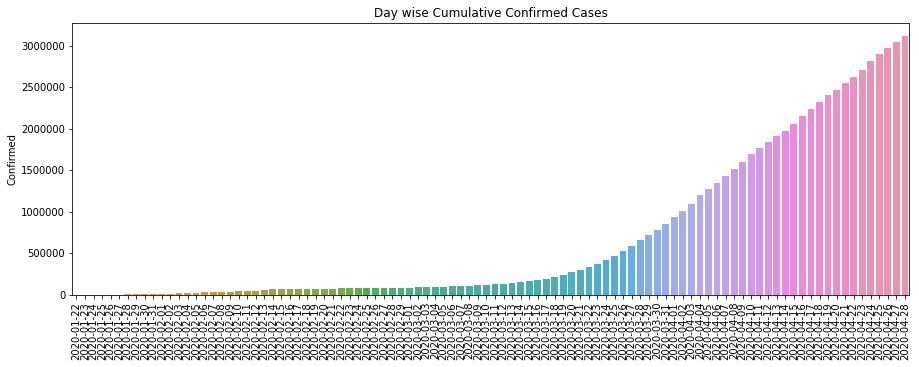

In [9]:
# Create a Daywise Confirmed cases barplot
plt.figure(figsize=(15,5))
sns.barplot(x=daywise_stat.index.date, y=daywise_stat['Confirmed'])
plt.xticks(rotation=90)
plt.title('Day wise Cumulative Confirmed Cases')
plt.show()

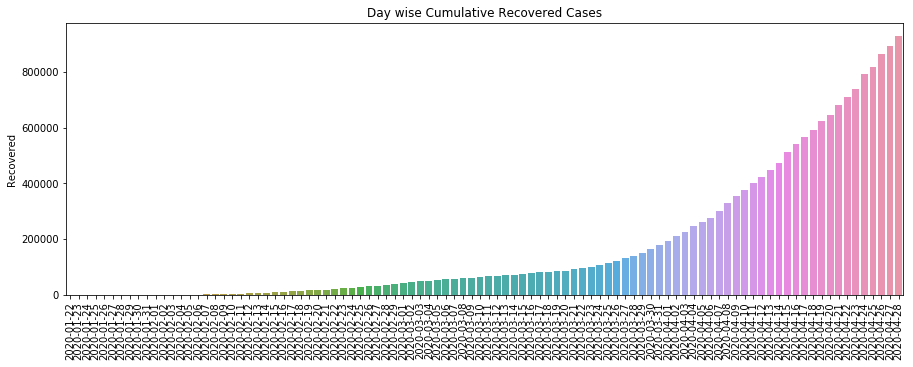

In [10]:
# Daywise Cumulative Recovered Cases
plt.figure(figsize=(15,5))
sns.barplot(x=daywise_stat.index.date, y=daywise_stat["Recovered"])
plt.xticks(rotation=90)
plt.title('Day wise Cumulative Recovered Cases')
plt.show()

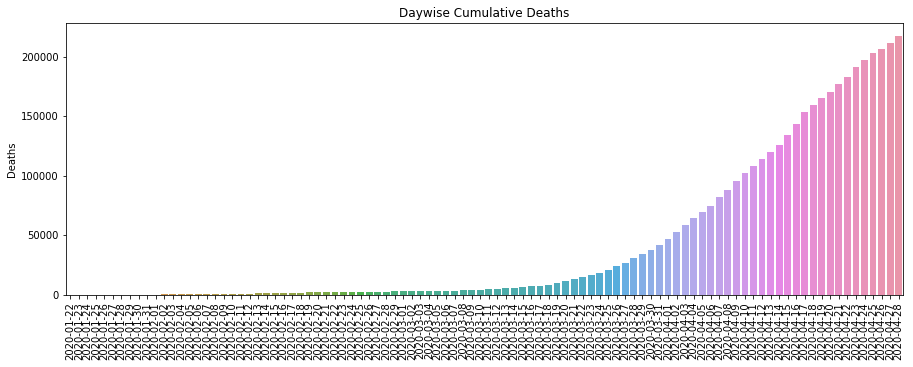

In [11]:
# Daywise Cumulative Deaths
plt.figure(figsize=(15,5))
sns.barplot(x=daywise_stat.index.date, y=daywise_stat["Deaths"])
plt.xticks(rotation=90)
plt.title('Daywise Cumulative Deaths')
plt.show()

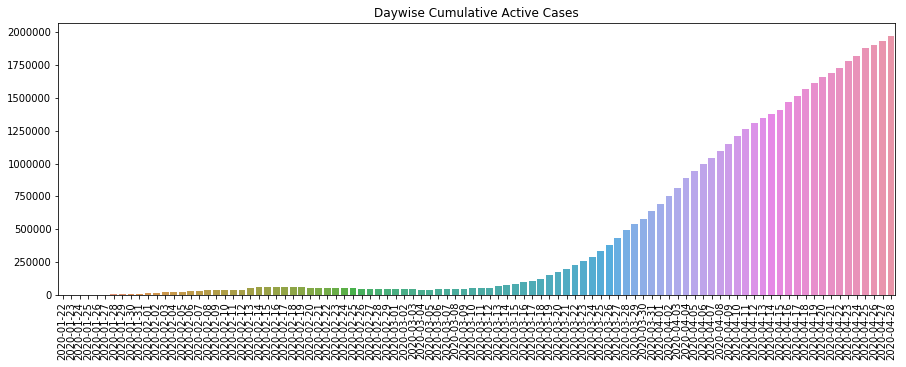

In [12]:
# Daywise Cumulative Active Cases
active_cases = daywise_stat["Confirmed"] - daywise_stat["Recovered"] - daywise_stat["Deaths"]
plt.figure(figsize=(15,5))
sns.barplot(x=daywise_stat.index.date, y=active_cases)
plt.xticks(rotation=90)
plt.title('Daywise Cumulative Active Cases')
plt.show()

The COVID-19 spread is exponentially increased after `03/15/2020`.

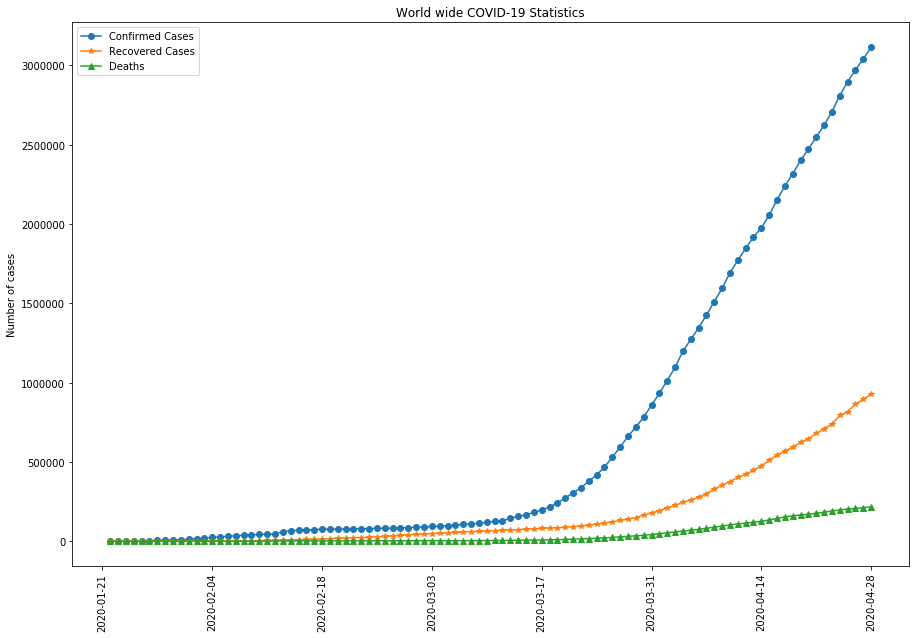

In [13]:
plt.figure(figsize=(15,10))
plt.plot(daywise_stat['Confirmed'], marker='o', label='Confirmed Cases')
plt.plot(daywise_stat['Recovered'], marker='*', label='Recovered Cases')
plt.plot(daywise_stat['Deaths'], marker='^', label='Deaths')
plt.ylabel('Number of cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('World wide COVID-19 Statistics')
plt.show()

### Growth Factor

The growth factor of the day is the ratio of total number of new cases to the total number of new cases in the previous day.

$$ {Growth\space factor\space of\space Confirmed\space cases} = \frac {Number\space of\space new\space Confirmed\space cases\space on\space i^{th}\space day} {Number\space of\space new\space Confirmed\space cases\space on\space (i-1)^{th}\space day}$$


In [14]:
daily_no_of_confirmed_cases = daywise_stat['Confirmed'].diff().fillna(0)
daily_no_of_recovered_cases = daywise_stat['Recovered'].diff().fillna(0)
daily_no_of_deaths = daywise_stat['Deaths'].diff().fillna(0)

In [16]:
gf_confirmed = [daily_no_of_confirmed_cases[i+1] / daily_no_of_confirmed_cases[i] for i in range(1, daily_no_of_confirmed_cases.shape[0]-1)]
gf_recovered = [daily_no_of_recovered_cases[i+1] / daily_no_of_recovered_cases[i] for i in range(1, daily_no_of_recovered_cases.shape[0]-1)]
gf_deaths = [daily_no_of_deaths[i+1] / daily_no_of_deaths[i] for i in range(1, daily_no_of_deaths.shape[0]-1)]

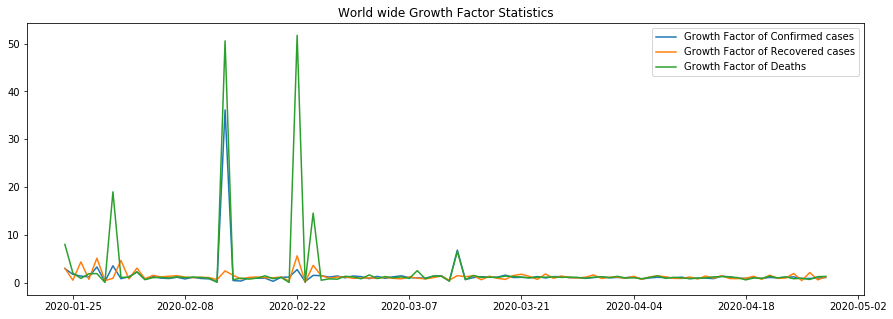

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(daywise_stat.index[2:], gf_confirmed, label='Growth Factor of Confirmed cases')
plt.plot(daywise_stat.index[2:], gf_recovered, label='Growth Factor of Recovered cases')
plt.plot(daywise_stat.index[2:], gf_deaths, label='Growth Factor of Deaths')
plt.legend()
plt.title('World wide Growth Factor Statistics')
plt.show()

## Prediction

In [18]:
res = linregress(range(daywise_stat.shape[0]), daywise_stat['Confirmed'])
print('Slope:', res.slope)
print('Intercept:', res.intercept)

Slope: 28172.16382635529
Intercept: -676992.8027210886


In [19]:
predicted_values = [res.slope * i + res.intercept for i in range(daywise_stat.shape[0])]

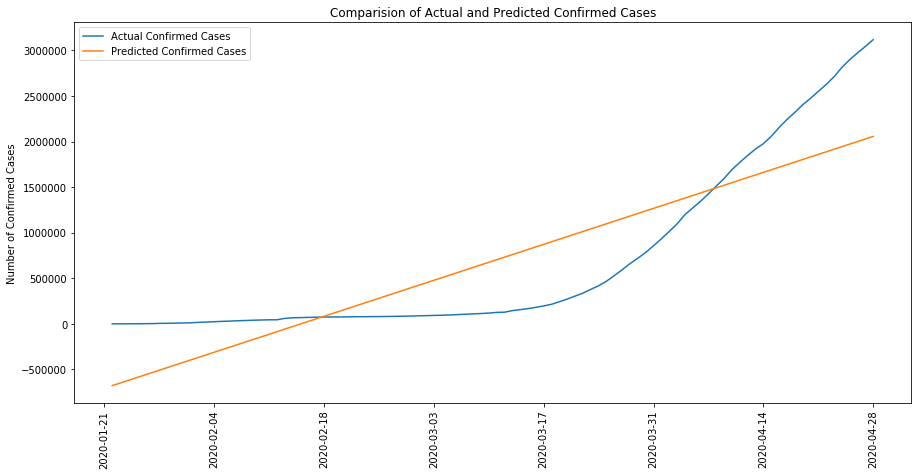

In [20]:
plt.figure(figsize=(15,7))
plt.plot(daywise_stat.index, daywise_stat['Confirmed'], label='Actual Confirmed Cases')
plt.plot(daywise_stat.index, predicted_values, label='Predicted Confirmed Cases')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('Comparision of Actual and Predicted Confirmed Cases')
plt.show()

In [21]:
# Predicting Confirmed Cases using Average Growth Factor
avg_growth_factor = sum(gf_confirmed) / len(gf_confirmed)
max_date = daywise_stat.index[-1]
max_confirmed_case = daywise_stat['Confirmed'][-1]

print('Average Growth Factor:', avg_growth_factor)
print('Last date in data:', max_date)
print('Total Confirmed cases till', max_date, ':', max_confirmed_case)

Average Growth Factor: 1.5438980484122327
Last date in data: 2020-04-28 00:00:00
Total Confirmed cases till 2020-04-28 00:00:00 : 3116398.0


In [22]:
predict_dates = []
predicted_confirm_cases = []
previous_number = max_confirmed_case

for i in range(16):
    predict_dates.append(max_date + i + 1)
    previous_number = previous_number * avg_growth_factor
    predicted_confirm_cases.append(previous_number)

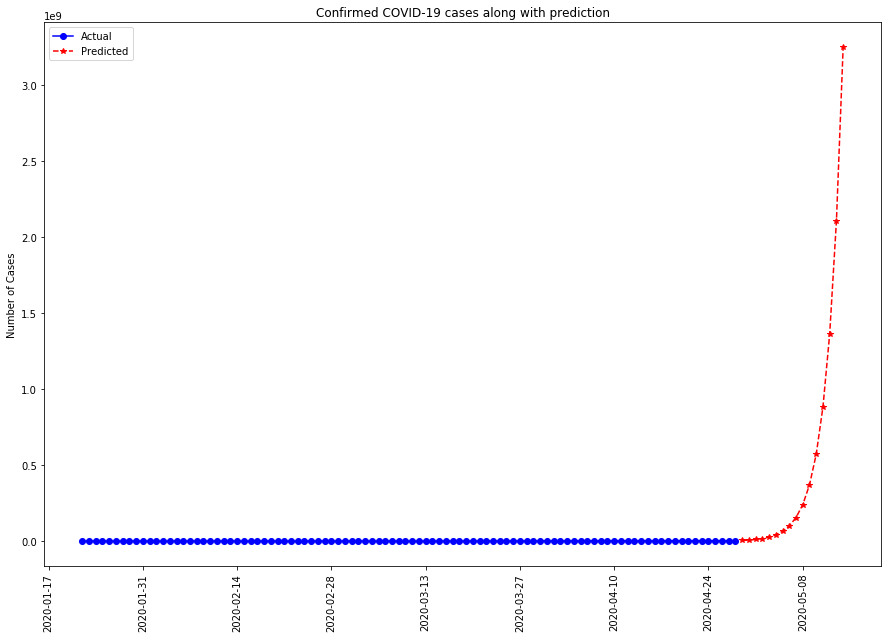

In [23]:
plt.figure(figsize=(15,10))
plt.plot(daywise_stat.index, daywise_stat['Confirmed'], linestyle='-', c='blue', marker='o', label='Actual')
plt.plot(predict_dates, predicted_confirm_cases, linestyle='dashed', c='red', marker='*', label='Predicted')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('Confirmed COVID-19 cases along with prediction')
plt.show()

This prediction using the average growth factor is showing a huge increase in the number of confirmed cases worldwide in forthcoming days.

## Comparing India with Top 10 countries

In [24]:
country_wise_data = covid_19.groupby(['Country/Region', 'ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
country_wise_data.head()

Confirmed  Recovered  Deaths
Country/Region  ObservationDate                              
 Azerbaijan     2020-02-28             1.0        0.0     0.0
('St. Martin',) 2020-03-10             2.0        0.0     0.0
Afghanistan     2020-02-24             1.0        0.0     0.0
                2020-02-25             1.0        0.0     0.0
                2020-02-26             1.0        0.0     0.0

In [25]:
country_wise_data.loc['Azerbaijan'].head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-03-01,3.0,0.0,0.0
2020-03-02,3.0,0.0,0.0
2020-03-03,3.0,0.0,0.0
2020-03-04,3.0,0.0,0.0
2020-03-05,6.0,0.0,0.0


In [26]:
last_day_data = covid_19[covid_19.loc[:, 'ObservationDate'] == max_date.strftime('%Y-%m-%d')]

country_wise_last_day_data = last_day_data.groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
country_wise_last_day_data.head()

,Confirmed,Recovered,Deaths
Country/Region,,,
Afghanistan,1828.0,228.0,58.0
Albania,750.0,431.0,30.0
Algeria,3649.0,1651.0,437.0
Andorra,743.0,398.0,41.0
Angola,27.0,6.0,2.0


In [27]:
top_10_countries = country_wise_last_day_data.sort_values(['Confirmed'], ascending=False).head(10).index.values
top_10_countries

array(['US', 'Spain', 'Italy', 'France', 'UK', 'Germany', 'Turkey',
       'Russia', 'Iran', 'Mainland China'], dtype=object)

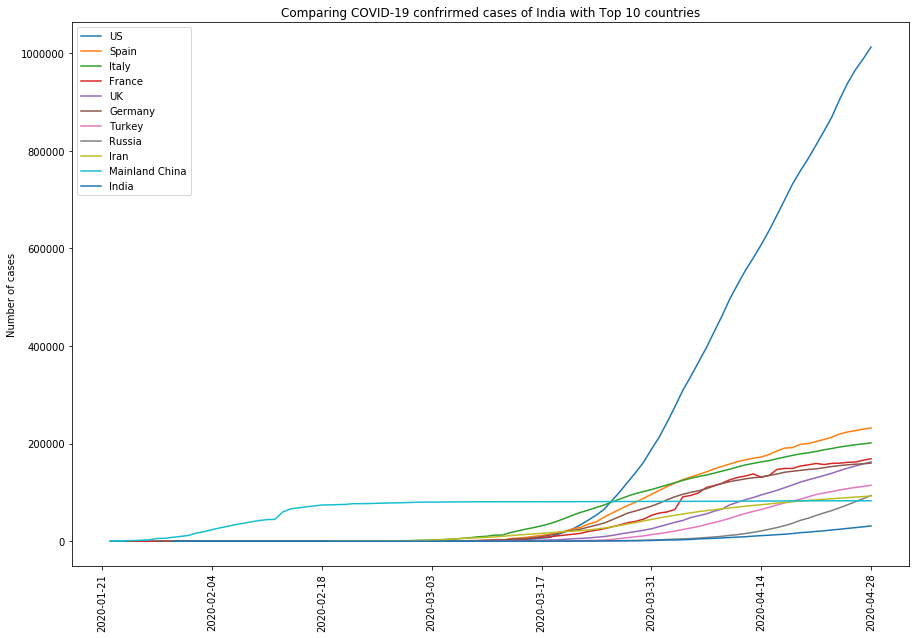

In [28]:
# plotting the line plots for top 10 countries along with India
country_labels = np.append(top_10_countries, ['India'])

plt.figure(figsize = (15, 10))
for country in country_labels:
    plt.plot(country_wise_data.loc[country]['Confirmed'], label=country)
    
plt.ylabel('Number of cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('Comparing COVID-19 confirmed cases of India with Top 10 countries')
plt.show()

The data shows that the US has the highest confirmed COVID cases. There is a huge difference between the US and the second top most country, Spain. From the beginning China was mostly affected and it was able to control it. In recent times all the countries' cases are growing exponentially.

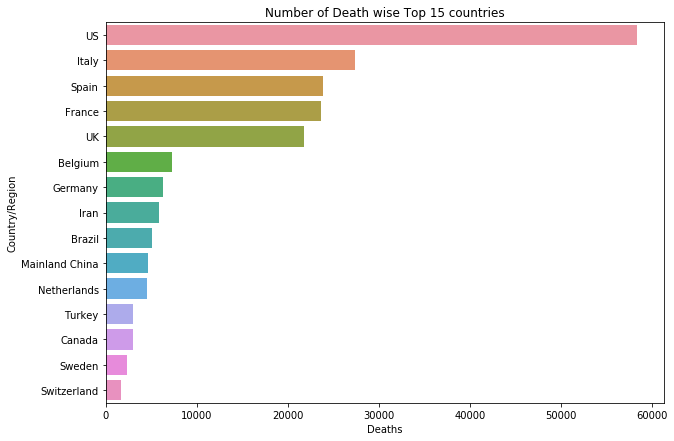

In [29]:
# Number of Deaths wise top 15 Countries bar plot
top_15_deaths = country_wise_last_day_data.sort_values(['Deaths'], ascending=False).head(15)

plt.figure(figsize=(10,7))
sns.barplot(x=top_15_deaths['Deaths'], y=top_15_deaths.index)
plt.title('Number of Death wise Top 15 countries')
plt.show()

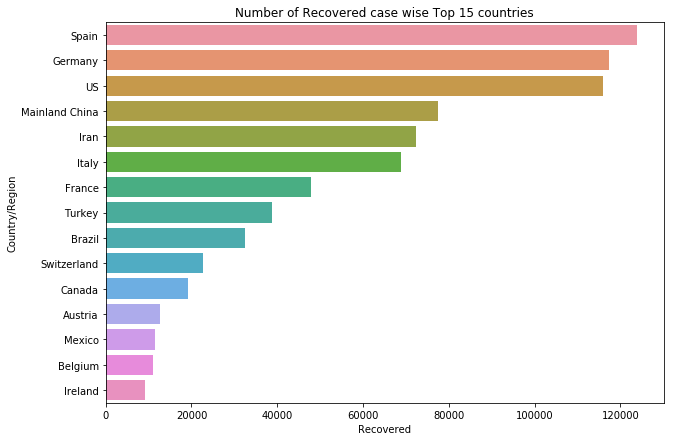

In [30]:
# Number of Recovered cases wise top 15 countries
top_15_recovered = country_wise_last_day_data.sort_values(['Recovered'], ascending=False).head(15)

plt.figure(figsize=(10,7))
sns.barplot(x=top_15_recovered['Recovered'], y=top_15_recovered.index)
plt.title('Number of Recovered case wise Top 15 countries')
plt.show()

Comparatively the US has more deaths. Spain was able to recover more numbers of COVID-19 affected cases.

## COVID statistics of India

In [31]:
covid_india_data = country_wise_data.loc['India']
covid_india_data.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


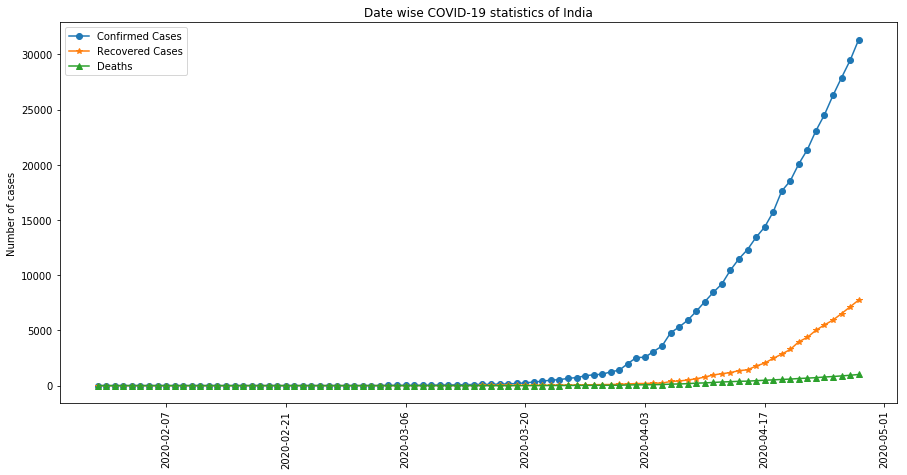

In [32]:
plt.figure(figsize=(15,7))
plt.plot(covid_india_data['Confirmed'], marker='o', label='Confirmed Cases')
plt.plot(covid_india_data['Recovered'], marker='*', label='Recovered Cases')
plt.plot(covid_india_data['Deaths'], marker='^', label='Deaths')
plt.ylabel('Number of cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('Date wise COVID-19 statistics of India')
plt.show()

In [33]:
# Growth Factor in India
ind_confirmed_gf = [covid_india_data['Confirmed'][i+1] / covid_india_data['Confirmed'][i] for i in range(covid_india_data.shape[0]-1)]
ind_recovered_gf = [covid_india_data['Recovered'][i+1] / covid_india_data['Recovered'][i] for i in range(covid_india_data.shape[0]-1)]
ind_deaths_gf = [covid_india_data['Deaths'][i+1] / covid_india_data['Deaths'][i] for i in range(covid_india_data.shape[0]-1)]

C:\Users\govinds\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\govinds\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\govinds\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\govinds\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


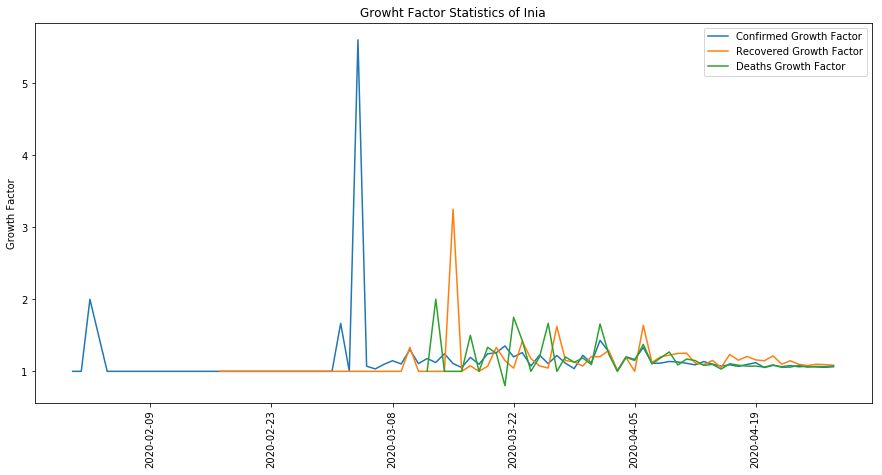

In [36]:
plt.figure(figsize=(15, 7))
plt.plot(covid_india_data.index[1:], ind_confirmed_gf, label='Confirmed Growth Factor')
plt.plot(covid_india_data.index[1:], ind_recovered_gf, label='Recovered Growth Factor')
plt.plot(covid_india_data.index[1:], ind_deaths_gf, label='Deaths Growth Factor')
plt.ylabel('Growth Factor')
plt.xticks(rotation=90)
plt.legend()
plt.title('Growht Factor Statistics of Inia')
plt.show()

In [37]:
# Prediction using linear Regression
reg_res = linregress(range(covid_india_data.shape[0]), covid_india_data['Confirmed'])
print('Slope:', reg_res.slope)
print('Intercept:', reg_res.intercept)

ind_predicted_values = [reg_res.slope * i + reg_res.intercept for i in range(covid_india_data.shape[0])]

Slope: 228.29537803020946
Intercept: -5825.588766788765


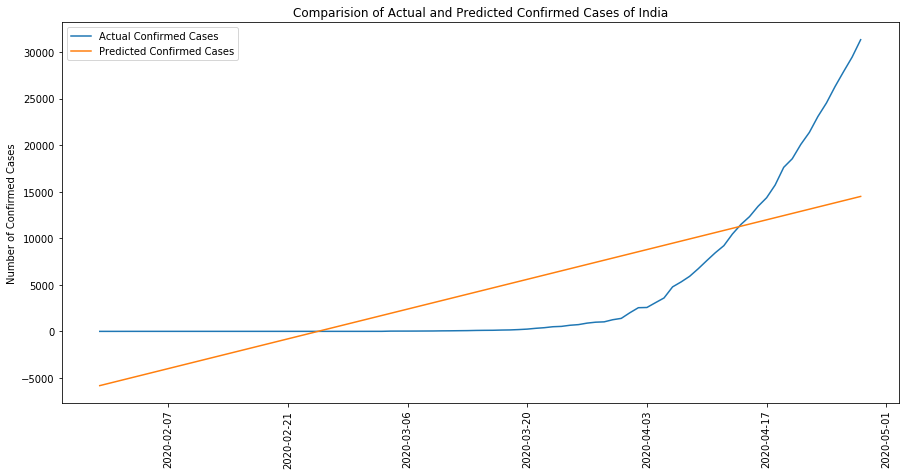

In [38]:
plt.figure(figsize=(15,7))
plt.plot(covid_india_data.index, covid_india_data['Confirmed'], label='Actual Confirmed Cases')
plt.plot(covid_india_data.index, ind_predicted_values, label='Predicted Confirmed Cases')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('Comparision of Actual and Predicted Confirmed Cases of India')
plt.show()

In [39]:
# Predicting Confirmed Cases using Average Growth Factor
ind_avg_growth_factor = sum(ind_confirmed_gf) / len(ind_confirmed_gf)
ind_max_confirmed_case = covid_india_data['Confirmed'][-1]
print('Average Growth Factor of Inida:', ind_avg_growth_factor)
print('Total Confirmed cases till', max_date.strftime('%Y-%m-%d'), ':', ind_max_confirmed_case)

Average Growth Factor of Inida: 1.1621637238089535
Total Confirmed cases till 2020-04-28 : 31324.0


In [40]:
ind_predict_dates = []
ind_predicted_confirm_cases = []
previous_number = ind_max_confirmed_case

for i in range(16):
    ind_predict_dates.append(max_date + i + 1)
    previous_number = previous_number * ind_avg_growth_factor
    ind_predicted_confirm_cases.append(previous_number)

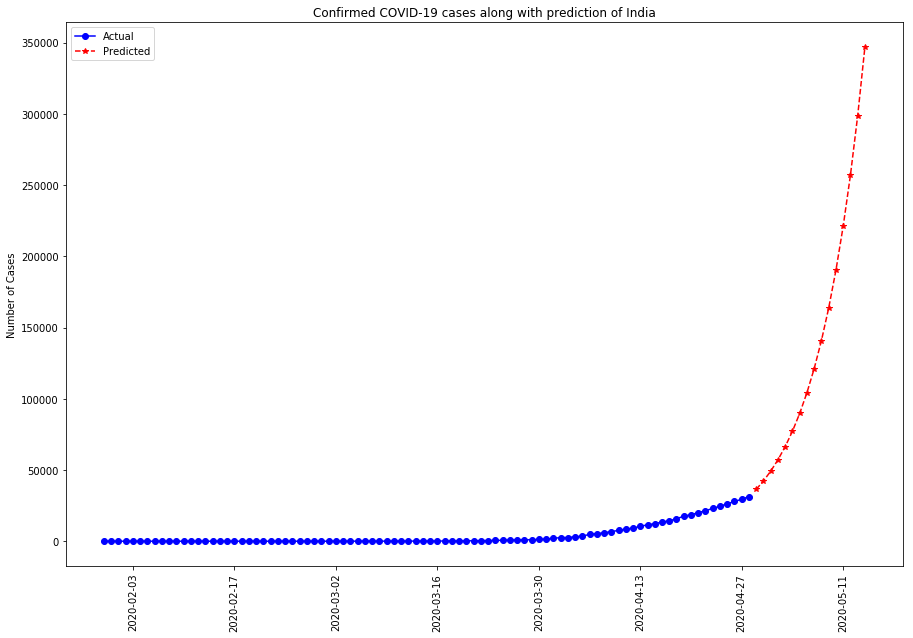

In [41]:
plt.figure(figsize=(15,10))
plt.plot(covid_india_data.index, covid_india_data['Confirmed'], linestyle='-', c='blue', marker='o', label='Actual')
plt.plot(ind_predict_dates, ind_predicted_confirm_cases, linestyle='dashed', c='red', marker='*', label='Predicted')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.title('Confirmed COVID-19 cases along with prediction of India')
plt.show()

## Conclusion

The Predicted graphs for worldwide and India both are showing there is a high chance of increasing COVID-19 cases in the forthcoming days. There is a need for high alert for all the people to strictly follow the safety measures to be able to fight with Corona disease.

**Star Safe & Stay Healthy**